# ULS Toyblocks Demo 

Notebook creator: Hannah Weiser & Sina Zumstein, 2023

This demo simulation uses 3D models of toyblocks, which will be scanned by UAV-borne laser scanning (ULS). We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point cloud.

In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir
os.chdir(helios_path)

## Survey and Scene
Let's just have a quick look at the survey XML file `uls_toyblocks_survey_scene_combo.xml` in `data/surveys/toyblocks`and what is special about it:

In [2]:
Code(display_xml(r'data\surveys\toyblocks\uls_toyblocks_survey_scene_combo.xml'), language='XML')

<document>
	<survey name="toyblocks_uls_surveyscene" platform="data/platforms.xml#quadcopter" scanner="data/scanners_als.xml#riegl_vux-1uav22" scene="data/surveys/toyblocks/uls_toyblocks_survey_scene_combo.xml#toyblocks_scene">
	<!-- platform: copter_linearpath, deflector: rotating -->
		<leg>
			<platformSettings x="-70.0" y="-60.0" z="80.000" onGround="false" movePerSec_m="10" smoothTurn="true" slowdownEnabled="false" />
			<scannerSettings active="true" pulseFreq_hz="50000" scanAngle_deg="90" scanFreq_hz="25" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="70.0" y="-60.0" z="80.000" onGround="false" movePerSec_m="10" smoothTurn="true" slowdownEnabled="false" />
			<scannerSettings active="true" pulseFreq_hz="50000" scanAngle_deg="90" scanFreq_hz="25" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="70.0" y="60.0" z="80.000" onGround="false" movePerSec_m="7" smoothTurn="true" slowdownEnabled="false" />
			<scannerSettings active="true" pulseFreq_hz="50000" scanAngle_deg="90" scanFreq_hz="25" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="-70.0" y="60.0" z="80.000" onGround="false" movePerSec_m="10" smoothTurn="true" slowdownEnabled="false" />
			<scannerSettings active="false" pulseFreq_hz="50000" scanAngle_deg="90" scanFreq_hz="25" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="0.0" y="-60.0" z="80.000" onGround="false" movePerSec_m="4" smoothTurn="true" slowdownEnabled="false" />
			<scannerSettings active="true" pulseFreq_hz="50000" scanAngle_deg="90" scanFreq_hz="25" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="0.0" y="60.0" z="80.000" onGround="false" movePerSec_m="10" />
			<scannerSettings active="false" pulseFreq_hz="50000" scanAngle_deg="90" scanFreq_hz="25" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
	</survey>

	<scene id="toyblocks_scene" name="ToyblocksScene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="80" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="efilepath" value="data/sceneparts/toyblocks/.*.obj" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-40.0;0.0;0" />
			</filter>
        </part>
    </scene>
</document>

Here we see the typical survey parameters such as the `<survey>` tag that define the scanner, platform, and scene, and the `leg` elements that define the waypoints and the respective scanner and platform settings. We also see that the scene file referenced in the `survey` tag is the survey file itself.  Both the `<survey>` and the `<scene>` configurations are combined in a single XML file. 

The scene is a very simple toy scene consisting of a ground plane and all `.obj` files that can be found in the directory `data/sceneparts/toyblocks`. To load these multiple objects with a single scene `part` definition, the `efilepath` parameter is used. It allows loading multiple objects from file using regular expressions. All of the toyblocks objects are furthermore translated by -40 m along the x-axis.

# Executing the Simulation 
Next, we will run the simulations for both surveys. In Jupyter Notebooks, we can run external commands with the !command syntax, but you can also just run it from the command line. We will run the ULS simulation first: 

In [3]:
!"run/helios.exe" data\surveys\toyblocks\uls_toyblocks_survey_scene_combo.xml -q

## The results 
Now we can display the 3D plot.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

output_path = find_playback_dir(r"data\surveys\toyblocks\uls_toyblocks_survey_scene_combo.xml")

print("Loading points from", Path(output_path).relative_to(helios_path).as_posix())

strip_1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'leg001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'leg002_points.xyz')
strip_4 = np.loadtxt(Path(output_path) / 'leg004_points.xyz')

#stacking the strips 
strips = np.vstack((strip_1, strip_2, strip_3, strip_4))

traj_1 = np.loadtxt(Path(output_path) / 'leg000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'leg001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'leg002_trajectory.txt')
traj_4 = np.loadtxt(Path(output_path) / 'leg004_trajectory.txt')

#stacking the trajectories 
traj = np.vstack((traj_1, traj_2, traj_3, traj_4))


Loading points from output/toyblocks_uls_surveyscene/2023-02-08_07-57-25


In [5]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

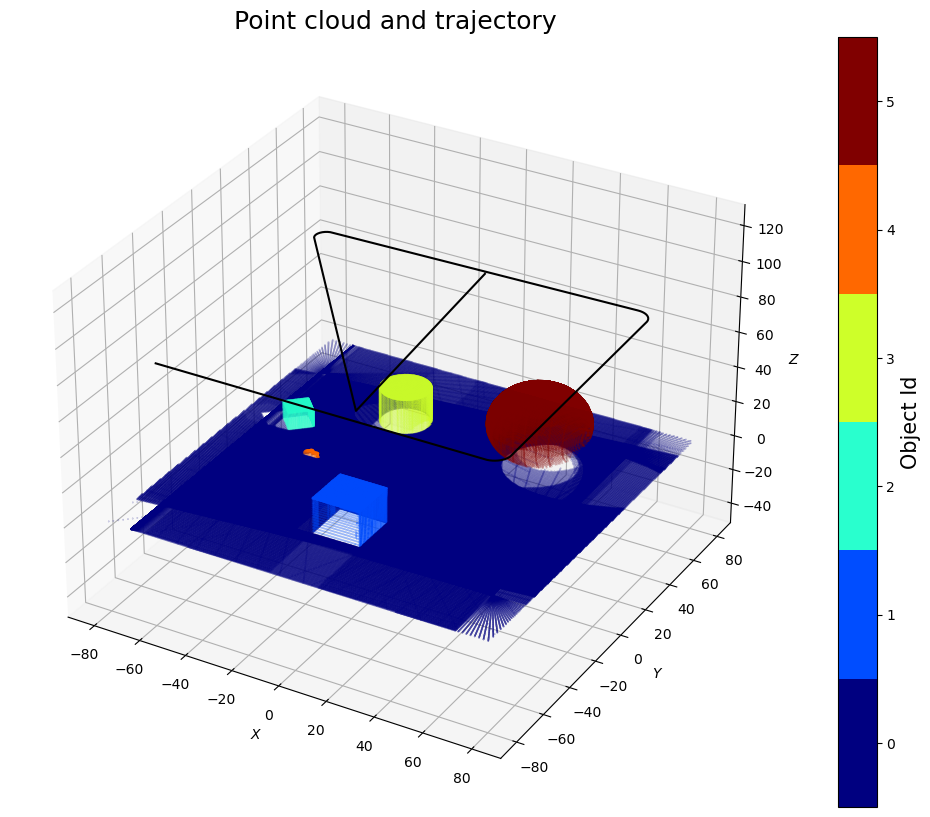

In [6]:
# Matplotlib figures.
fig = plt.figure(figsize=(15,10))


#settings for a discrete colorbar
N=6
cmap=plt.get_cmap('jet',N)

# Scatter plot (coloured by hitObjectId).
ax = fig.add_subplot(projection='3d', computed_zorder=False)
sc = ax.scatter(strips[:, 0], strips[:, 1], strips[:, 2], c=strips[:, 8], cmap=cmap, s=0.02, label='scene', zorder=1)

# Plot of trajectory.
ax.plot(traj[:,0], traj[:,1], traj[:,2], c = 'black', label = 'scanner trajectory', zorder=2)

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory',fontsize=18)


cbar = plt.colorbar(sc, ticks=[5/12, 5/4, 25/12, 35/12, 45/12, 55/12])

cbar.set_label("Object Id", fontsize=15)
cbar.ax.set_yticklabels(['0', '1', '2', '3', '4', '5'])

# Display results
plt.show()
